<a href="https://colab.research.google.com/github/rajy4683/S8EVA4/blob/master/S8EVA4_SingleScript2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import sys

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive



### **[RekogNizer library](https://github.com/rajy4683/RekogNizer.git) contains the following files:**
```
1. basemodelclass.py:   Contains core model definitions. 
2. fileutils.py:        Contains utility functions for model_name_generation, plotting functions 
3. dataloader.py:       Contains dataloaders for both training and test data
4. traintest.py:        Contains core training, test and model execution flow routines. 
5. logger.py:           Contains functions to handle WANDB integration
6. hyperparams.py:      Contains values of default hyperparameters alongwith getter and setter functions   
7. train_s7_new.py:     Main wrapper script or point of entry. It parses hyperparameters as arguments
8. requirements.txt:    Specific libraries that need to be available in the environment
```








#### Downloading and installing dependencies from the GitHub link:


In [0]:
!git clone https://github.com/rajy4683/RekogNizer.git /content/drive/My\ Drive/EVA4/RekogNizer

In [5]:
!pip install -r /content/drive/My\ Drive/EVA4/RekogNizer/requirements.txt

#### WANDB client login

In [6]:
!wandb login a6f947d2d2f69e7a8c8ca0f69811fd554f27d204

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
Successfully logged in to Weights & Biases!


In [0]:
sys.path.append('/content/drive/My Drive/EVA4/')
sys.path.append('/content/drive/My Drive/EVA4/RekogNizer')

train_s7_new.py currently can take JSON formatted string as input. Following parameters are configurable and are used in the model training and execution.
```
{"project": "news5", 
 "sched_lr_gamma": 0.5, 
 "no_cuda": false, 
 "dropout": 0.1, 
 "test_batch_size": 128, 
 "batch_size": 128, 
 "epochs": 45, 
 "bias": false, 
 "lr": 0.001, 
 "start_lr": 0, 
 "sched_lr_step": 1, 
 "weight_decay": 0.0, 
 "seed": 1, 
 "momentum": 0.9}

```
This script will be enhanced to handle the following:


1. Inferencing from a saved model
2. Loading and retraining the model
3. Displaying run results from a saved model.
4. Samples of train/test loader data

All the above functions are implemented already as APIs in the RekogNizer library.


Finally the training run!

In [9]:
!python /content/drive/My\ Drive/EVA4/RekogNizer/train_s8_new.py -p '{"lr":0.1,"dropout":0.1, "momentum":0.9, "epochs":50, "start_lr":30, "sched_lr_step":5,"sched_lr_gamma":0.1 }'

Setting  lr  =  0.1
Setting  dropout  =  0.1
Setting  momentum  =  0.9
Setting  epochs  =  50
Setting  start_lr  =  30
Setting  sched_lr_step  =  5
Setting  sched_lr_gamma  =  0.1
Final Hyperparameters
             dropout : 0.1 
          batch_size : 128 
     test_batch_size : 128 
                  lr : 0.1 
            momentum : 0.9 
             no_cuda : False 
                seed : 1 
              epochs : 50 
                bias : False 
      sched_lr_gamma : 0.1 
       sched_lr_step : 5 
            start_lr : 30 
        weight_decay : 0.0 
             project : news5 
Initializing datasets and dataloaders
Files already downloaded and verified
Files already downloaded and verified
wandb: Tracking run with wandb version 0.8.29
wandb: Run data is saved locally in wandb/run-20200306_065754-sf2ld5bx
wandb: Syncing run dulcet-darkness-787
wandb: ⭐️ View project at https://app.wandb.ai/rajy4683/news5
wandb: 🚀 View run at https://app.wandb.ai/rajy4683/news5/runs/sf2ld5bx
wan

In [0]:
!cp /content/drive/My\ Drive/EVA4/model_saves/model-ddf45e38f9.h5 /content/drive/My\ Drive/EVA4/baseline_models

In [0]:
from RekogNizer import traintest
from RekogNizer import logger
from RekogNizer import fileutils
from RekogNizer import basemodelclass
from RekogNizer import dataloader

import pandas as pd
import numpy as np
import torch

In [0]:
run_list = ["rajy4683/news5/runs/sf2ld5bx"]
runs_df = logger.get_wandb_dataframes(run_list=run_list)
new_df = pd.DataFrame().append(runs_df)

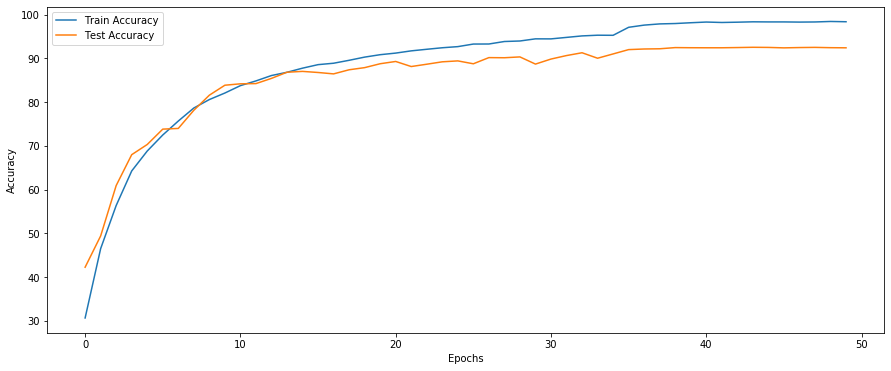

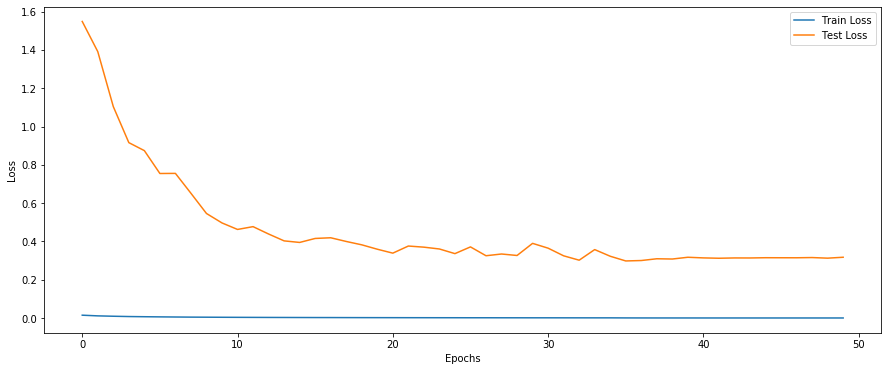

In [12]:
fileutils.plot_graphs([new_df],
            ['Train Accuracy', 'Test Accuracy'],
            columns=['Train Accuracy', 'Test Accuracy'],
            xlabel="Epochs",
            ylabel="Accuracy")

fileutils.plot_graphs([new_df],
            ['Train Loss', 'Test Loss'],
            columns=['Train Loss', 'Test Loss'],
            xlabel="Epochs",
            ylabel="Loss")

In [0]:
%load_ext autoreload
%autoreload 2
from RekogNizer import traintest
import torchvision.transforms as transforms
import torchvision

my_model,acc = traintest.model_builder2(basemodelclass.ResNet18(0.1), weights_path="/content/drive/My Drive/EVA4/model_saves/model-ddf45e38f9.h5")
#class_accuracy_dict = traintest.classwise_accuracy(my_model, testloader, classes, device=torch.device("cpu"))

In [14]:
from RekogNizer import hyperparams
transform_test = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                    download=True, transform=transform_test)
testloader = dataloader.get_dataloader(testset, hyperparams.hyperparameter_defaults['batch_size'], shuffle=False, num_workers=2)
class_accuracy_dict = traintest.classwise_accuracy(my_model, testloader, dataloader.classes, device=torch.device("cuda"))

Files already downloaded and verified
Accuracy of plane : 90 %
Accuracy of   car : 95 %
Accuracy of  bird : 85 %
Accuracy of   cat : 81 %
Accuracy of  deer : 88 %
Accuracy of   dog : 83 %
Accuracy of  frog : 92 %
Accuracy of horse : 93 %
Accuracy of  ship : 94 %
Accuracy of truck : 91 %


<BarContainer object of 10 artists>

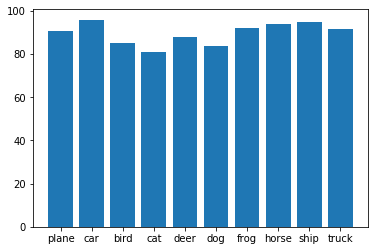

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.bar([key for key in class_accuracy_dict.keys()],[val for val in class_accuracy_dict.values()])